In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read CSV
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)


# Remove duplicates
city_df = city_df.drop_duplicates(['city'], keep='first')


In [3]:
# Outer merge the city and ride data on city
combined_data = pd.merge(city_df,ride_df,how='outer', on='city')
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [4]:
# Group data by city
city_group = combined_data.groupby(['city','type'])

# Average ($) fare per city
fare = city_group['fare'].mean()
# Total number of rides per city
rides = city_group['ride_id'].count()
# Number of drivers per city
drivers = city_group['driver_count'].mean() # size of bubble

# Create dataframe
plt_df = pd.DataFrame({"Average Fare ($)": fare,
          "Total Number of Rides per City": rides,
          "Driver Count": drivers})


# Reset index to city type
plt_df = plt_df.reset_index(level='type')

# Rename the type and city columns
plt_df = plt_df.rename(columns={"type": "City Types"})

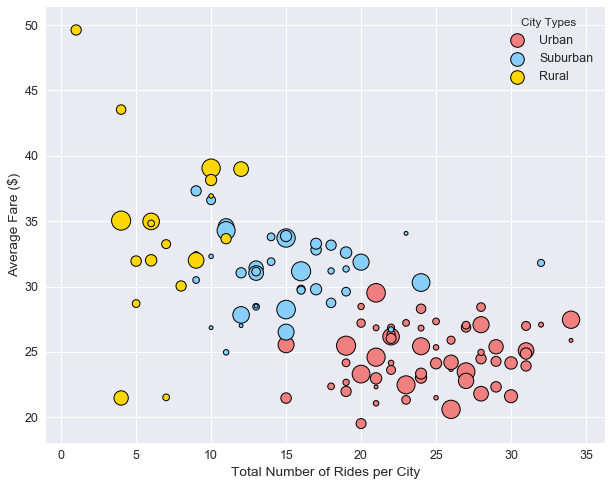

In [5]:
# Define plot size
sns.set(font_scale=1.25)

# Define colors
col_list = ["lightskyblue", "gold", "lightcoral"]

b_plot = sns.lmplot(x='Total Number of Rides per City', y='Average Fare ($)', data=plt_df, fit_reg=False, 
                   scatter_kws={'s':(plt_df['Driver Count'] * 5), 'alpha':1, 'linewidths':1, 'edgecolor':'k'}, 
                   legend_out=False, palette=dict(Suburban=col_list[0], Rural=col_list[1], Urban=col_list[2]),
                   hue='City Types', size=7, aspect=1.25)

plt.show()

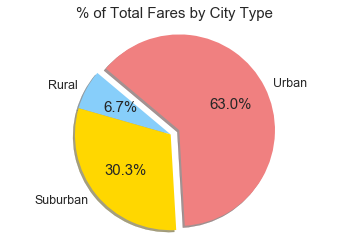

In [7]:
# Groupby type to begin making pie charts based on city type
type_df = combined_data.groupby(['type'])

# Sum the total fares by city type
fare_totals = type_df['fare'].sum()

# Create pie chart
explode = (0, 0, 0.1)
plt.pie(fare_totals, explode=explode, labels=type_df.groups, colors=col_list, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("% of Total Fares by City Type")
plt.show()

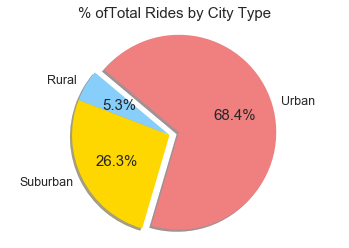

In [8]:
# Create a pie chart for Total Rides by City Type
total_rides = type_df['ride_id'].count()
explode = (0, 0, 0.1)
plt.pie(total_rides, explode=explode, labels=type_df.groups, colors=col_list, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("% ofTotal Rides by City Type")
plt.show()

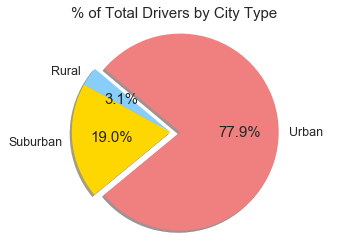

In [9]:
# Create a pie chart for Total Drivers by City Type
# Find unique values to sum in driver count by using df with dropped duplicates
unique_df = combined_data.drop_duplicates(['city'], keep='first')
total_drivers = unique_df.groupby('type').sum()['driver_count']

explode = (0, 0, 0.1)
plt.pie(total_drivers, explode=explode, labels=type_df.groups, colors=col_list, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("% of Total Drivers by City Type")
plt.show()